In [2]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline 

int32


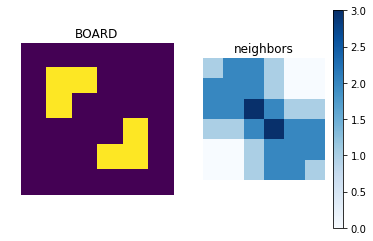

In [8]:
# BOARD initialization
BOARD = np.zeros(shape=(6,6), dtype=np.bool)
BOARD[[1,1,2,3,4,4], [1,2,1,4,3,4]] = True

# This convolution kernel counts how many neighbors a cell has
kernel = np.ones(shape=(3,3), dtype=np.int)
kernel[1,1] = 0

# Map of number of neighbors for each cell
neighbors = scipy.signal.convolve2d(BOARD, kernel, mode="same")

# Display
plt.figure()

plt.subplot(121)
plt.imshow(BOARD)
plt.set_cmap('viridis')
plt.title("BOARD")
plt.axis('off')

plt.subplot(122)
plt.imshow(neighbors)
plt.set_cmap("Blues")
plt.title("neighbors")
plt.axis('off')
plt.colorbar()

plt.show()

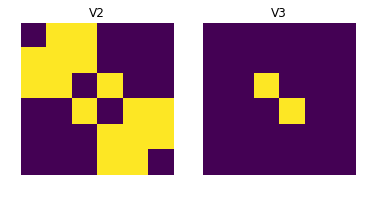

In [12]:
# Computing condition maps
V2 = np.array((neighbors==2), dtype=np.bool)
V3 = np.array((neighbors==3), dtype=np.bool)

# Display
plt.figure()

plt.subplot(121)
plt.imshow(V2)
plt.set_cmap('viridis')
plt.title("V2")
plt.axis('off')

plt.subplot(122)
plt.imshow(V3)
plt.set_cmap('viridis')
plt.title("V3")
plt.axis('off')

plt.show()

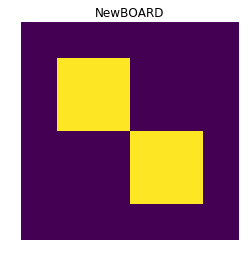

In [88]:
# Computing the Newborns map
Newborns = np.invert(np.bitwise_or(BOARD, np.invert(V3)))

# Computing the Survivors map
Survivors = np.bitwise_and(BOARD.astype(np.bool), np.bitwise_or(V2, V3))

# Computing the NewBOARD
NewBOARD = Newborns + Survivors

# Display
plt.figure()
plt.imshow(NewBOARD)
plt.set_cmap('viridis')
plt.title("NewBOARD")
plt.axis('off')
plt.show()

# Multiple iterations test

In [45]:
# Wrapping everything in a function
def takeOneStep(BOARD):
    # Convolution step gives how many individuals in a neighborhood
    kernel = np.ones(shape=(3,3), dtype=np.int)
    neighborhood = scipy.signal.convolve2d(BOARD, kernel, mode="same")

    # Substract house-holder to get the number of neighbors
    neighbors = neighborhood - BOARD
    
    # Computing condition maps
    V2 = np.array((neighbors==2), dtype=np.int)
    V3 = np.array((neighbors==3), dtype=np.int)
    
    # Computing the Newborns map
    ONES = np.ones(shape=(V3.shape[0], V3.shape[1]), dtype=np.int)
    Newborns = np.logical_not(np.bitwise_or(BOARD, (ONES - V3))).astype(np.int)

    # Computing the Survivors map
    Survivors = np.bitwise_and(BOARD, (V2 + V3))

    # Computing the NewBOARD
    NewBOARD = Newborns + Survivors
    
    return NewBOARD

In [46]:
# Wrapping everything in a function
def takeOneStepFAST(BOARD):
    
    # Makes sure BOARD is a boolean matrix
    BOARD = BOARD.astype(np.bool)
    
    # This convolution kernel counts how many neighbors a cell has
    kernel = np.ones(shape=(3,3), dtype=np.int)
    kernel[1,1] = 0

    # Map of number of neighbors for each cell
    neighbors = scipy.signal.convolve2d(BOARD, kernel, mode="same")
    
    # Computing condition maps
    V2 = np.array((neighbors==2), dtype=np.bool)
    V3 = np.array((neighbors==3), dtype=np.bool)
    
    # Computing the Newborns map
    Newborns = np.invert(np.bitwise_or(BOARD, np.invert(V3)))

    # Computing the Survivors map
    Survivors = np.bitwise_and(BOARD, np.bitwise_or(V2, V3))

    # Computing the NewBOARD
    NewBOARD = Newborns + Survivors
    
    return NewBOARD

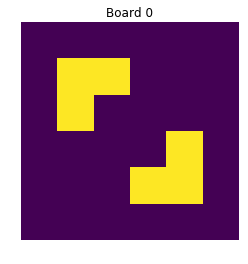

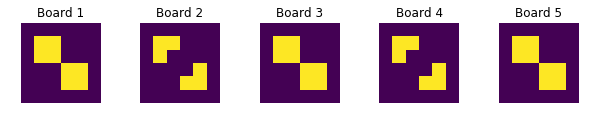

In [47]:
# BOARD initialization
BOARD = np.zeros(shape=(6,6), dtype=np.bool)
BOARD[[1,1,2,3,4,4], [1,2,1,4,3,4]] = True

# Initial display
plt.figure()
plt.imshow(BOARD)
plt.set_cmap('viridis')
plt.title("Board 0")
plt.axis('off')
plt.show()

# Number of steps to process
N = 5

# For N iterations
fig, axs = plt.subplots(1, N, figsize=(10, 50))
fig.subplots_adjust(hspace = .5, wspace=.5)

for i in list(range(N)):
    BOARD = takeOneStepFAST(BOARD)
    
    #Display
    axs[i].imshow(BOARD)
    axs[i].set_title("Board " + str(i+1))
    axs[i].axis('off')

plt.show()

# Speed Test

In [49]:
import time
N = int(1e5)

BOARD = np.zeros(shape=(6,6), dtype=np.bool)
BOARD[[1,1,2,3,4,4], [1,2,1,4,3,4]] = True

start = time.time()
for i in list(range(N)):
    BOARD = takeOneStepFAST(BOARD)
stop = time.time()
print("FAST implementation :\n\tTotal = {0:.2f} s\n\tAvg = {1:.5f} ms".format(stop-start, 1e3*(stop-start)/float(N)))

print("\n--------------------------------\n")
BOARD = np.zeros(shape=(6,6), dtype=np.int)
BOARD[[1,1,2,3,4,4], [1,2,1,4,3,4]] = 1

start = time.time()
for i in list(range(N)):
    BOARD = takeOneStep(BOARD)
stop = time.time()
print("Slow implementation :\n\tTotal = {0:.2f} s\n\tAvg = {1:.5f} ms".format(stop-start, 1e3*(stop-start)/float(N)))
    

FAST implementation :
	Total = 2.53 s
	Avg = 0.02531 ms

--------------------------------

Slow implementation :
	Total = 2.83 s
	Avg = 0.02829 ms
